<a href="https://colab.research.google.com/github/prasad-dash/Word-Prediction-using-RNN/blob/main/WordPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
!wget  https://www.gutenberg.org/files/64771/64771-0.txt -O dataO.txt


--2021-03-11 08:41:48--  https://www.gutenberg.org/files/64771/64771-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138000 (135K) [text/plain]
Saving to: ‘dataO.txt’

dataO.txt           100%[===================>] 134.77K   104KB/s    in 1.3s    

2021-03-11 08:41:51 (104 KB/s) - ‘dataO.txt’ saved [138000/138000]



In [ ]:
file=open("/content/data_mod.txt","r",encoding="utf-8")

In [ ]:
sentences=[]
for sentence in file:
  sentences.append(sentence)

In [ ]:
data = ""

for i in sentences:
    data = ' '. join(sentences)
    
list_lines=[]
list_lines=data.split(".")
list_lines=[sentence+" ." for sentence in list_lines]
list_lines=[sentence.replace('\n','') for sentence in list_lines]
final_list="".join(list_lines)


In [ ]:
tokeniser=tf.keras.preprocessing.text.Tokenizer()
tokeniser.fit_on_texts([final_list])
token_list=tokeniser.texts_to_sequences([final_list])[0]
vocab_size=len(tokeniser.word_index)+1

In [ ]:
X=[]
Y=[]
for i in range(8,len(token_list)):
  x=token_list[i-8:i]
  X.append(x)
  Y.append(token_list[i])
X_train=X[0:int(4*len(X)/5)]
X_test=X[int(4*len(X)/5):]
Y_train=Y[0:int(4*len(X)/5)]
Y_test=Y[int(4*len(X)/5):]
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
print(len(X))
Y_train=tf.keras.utils.to_categorical(Y_train,vocab_size)
Y_test=tf.keras.utils.to_categorical(Y_test,vocab_size)
#tf.keras.utils.to_categorical()

471


In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=10,input_length=8))
model.add(tf.keras.layers.LSTM(1000,return_sequences=True))
model.add(tf.keras.layers.LSTM(1000))
model.add(tf.keras.layers.Dense(1000,activation="relu"))
model.add(tf.keras.layers.Dense(vocab_size,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 10)             2550      
_________________________________________________________________
lstm_4 (LSTM)                (None, 8, 1000)           4044000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 255)               255255    
Total params: 13,306,805
Trainable params: 13,306,805
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.Adam(lr=0.001),metrics="accuracy")
model.fit(X_train, Y_train, epochs=20, batch_size=64,validation_data=(X_test,Y_test))

Epoch 1/20
6/6 [==============================] - 3s 158ms/step - loss: 5.5322 - accuracy: 0.0483 - val_loss: 5.3101 - val_accuracy: 0.0632
Epoch 2/20
6/6 [==============================] - 0s 29ms/step - loss: 5.3480 - accuracy: 0.0752 - val_loss: 5.4444 - val_accuracy: 0.0632
Epoch 3/20
6/6 [==============================] - 0s 26ms/step - loss: 5.3627 - accuracy: 0.0390 - val_loss: 5.4280 - val_accuracy: 0.0632
Epoch 4/20
6/6 [==============================] - 0s 25ms/step - loss: 5.1410 - accuracy: 0.0465 - val_loss: 5.5689 - val_accuracy: 0.0632
Epoch 5/20
6/6 [==============================] - 0s 26ms/step - loss: 5.0370 - accuracy: 0.0524 - val_loss: 5.8309 - val_accuracy: 0.0632
Epoch 6/20
6/6 [==============================] - 0s 25ms/step - loss: 5.0027 - accuracy: 0.0640 - val_loss: 5.8458 - val_accuracy: 0.0632
Epoch 7/20
6/6 [==============================] - 0s 25ms/step - loss: 4.9886 - accuracy: 0.0654 - val_loss: 6.2707 - val_accuracy: 0.0632
Epoch 8/20
6/6 [==========

In [ ]:
histoy=model.fit(X_train, Y_train, epochs=20, batch_size=64,validation_data=(X_test,Y_test) )

Epoch 1/20
6/6 [==============================] - 0s 34ms/step - loss: 1.0555 - accuracy: 0.6543 - val_loss: 28.9681 - val_accuracy: 0.0316
Epoch 2/20
6/6 [==============================] - 0s 26ms/step - loss: 0.7755 - accuracy: 0.7473 - val_loss: 28.5575 - val_accuracy: 0.0211
Epoch 3/20
6/6 [==============================] - 0s 26ms/step - loss: 0.6619 - accuracy: 0.7979 - val_loss: 30.1257 - val_accuracy: 0.0105
Epoch 4/20
6/6 [==============================] - 0s 25ms/step - loss: 0.5312 - accuracy: 0.8404 - val_loss: 31.5320 - val_accuracy: 0.0316
Epoch 5/20
6/6 [==============================] - 0s 25ms/step - loss: 0.5223 - accuracy: 0.8298 - val_loss: 33.1411 - val_accuracy: 0.0316
Epoch 6/20
6/6 [==============================] - 0s 25ms/step - loss: 0.4962 - accuracy: 0.8351 - val_loss: 33.6032 - val_accuracy: 0.0316
Epoch 7/20
6/6 [==============================] - 0s 24ms/step - loss: 0.4253 - accuracy: 0.8590 - val_loss: 33.4748 - val_accuracy: 0.0421
Epoch 8/20
6/6 [====

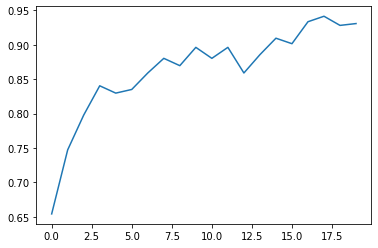

In [ ]:
plt.plot(histoy.history['accuracy'])

In [ ]:
test_string="any broadcastr of the broadcast may be had "
x=tokeniser.texts_to_sequences([test_string])
print(x)
y=model.predict(x)

[[14, 2, 1, 48, 22, 23, 59]]


In [ ]:
print(y.sum())

0.99999994


In [ ]:
y.argmax()

88

In [ ]:
tokeniser.index_word[y.argmax()]

'speculation'